In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['UCI_Credit_Card.csv']


In [6]:
df = pd.read_csv('../input/UCI_Credit_Card.csv')
X = df.iloc[:,1:24]
Y = df['default.payment.next.month']

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Text(0.5,1,'Heatmap of Correlation Matrix')

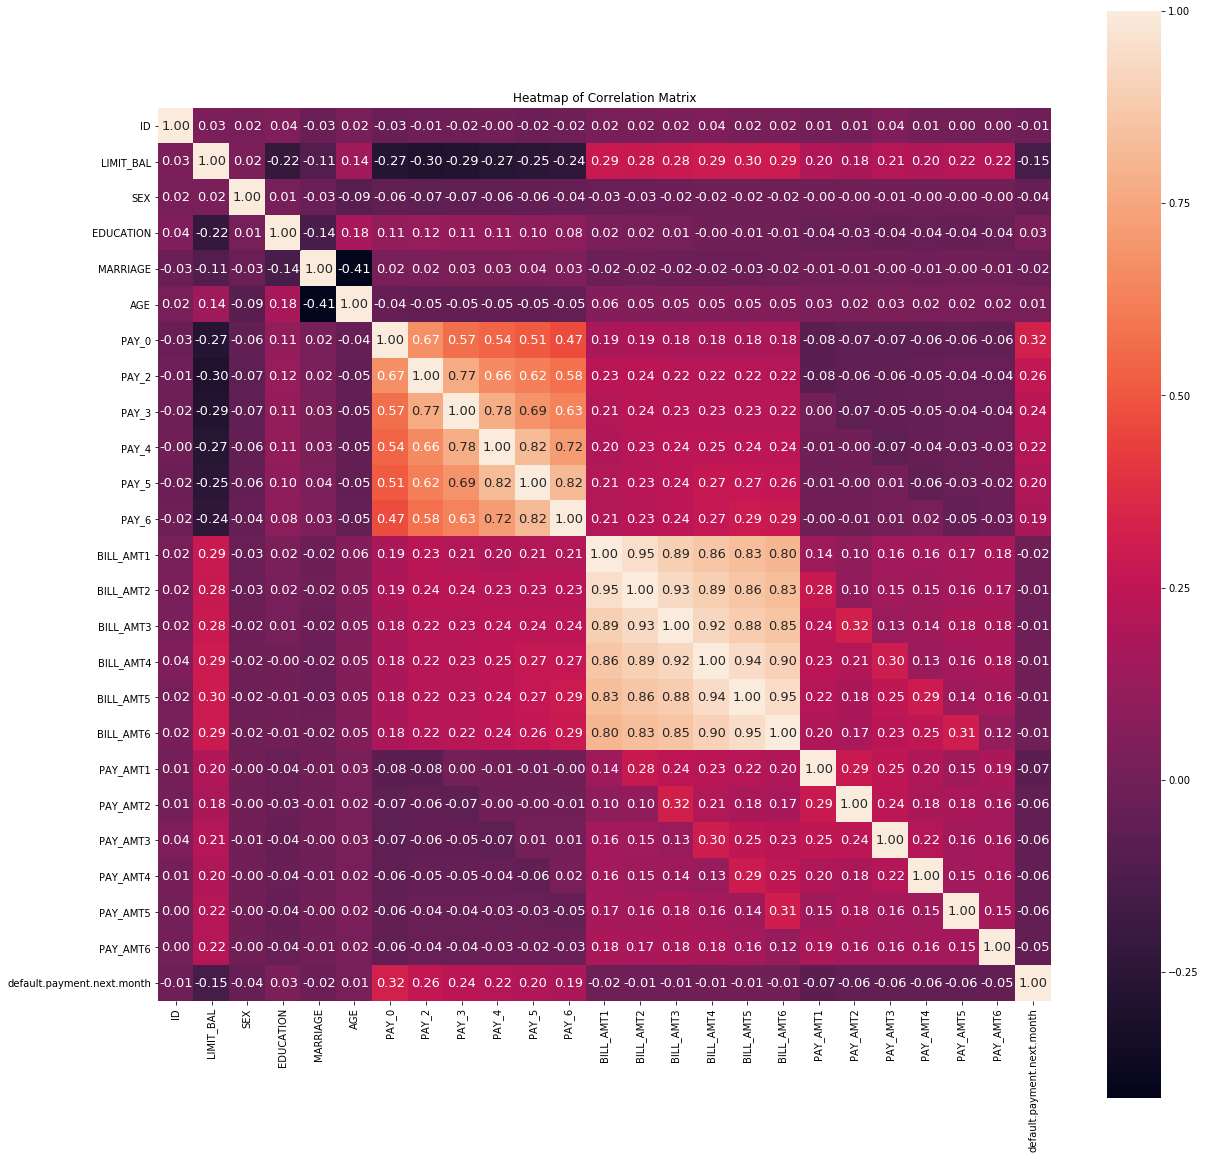

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr=df.corr()
corr = (corr)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

In [12]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False)
sex = OHE.fit_transform(X[['SEX']])
marriage = OHE.fit_transform(X[['MARRIAGE']])
education = OHE.fit_transform(X[['EDUCATION']])

cat_variables = np.hstack((sex, marriage, education))

cat_var_names = ['SEX','MARRIAGE', 'EDUCATION']

num_variables = X.drop(cat_var_names, axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(num_variables)
stdz_num_variables = scaler.transform(num_variables)

final_X = np.hstack((cat_variables,stdz_num_variables))

In [14]:
from sklearn.feature_selection import SelectKBest

test = SelectKBest(k=10)
fit = test.fit(final_X,Y)
np.set_printoptions(precision=1)
print(fit.scores_)
features = fit.transform(final_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,Y, test_size=0.33, random_state=42)

[  4.8e+01   4.8e+01   5.2e+00   2.7e+01   2.8e+01   2.9e+00   4.0e+00
   7.9e+01   4.0e+01   3.2e+01   1.9e+01   4.0e+01   1.2e+00   7.2e+02
   5.8e+00   3.5e+03   2.2e+03   1.8e+03   1.5e+03   1.3e+03   1.1e+03
   1.2e+01   6.0e+00   5.9e+00   3.1e+00   1.4e+00   8.7e-01   1.6e+02
   1.0e+02   9.5e+01   9.7e+01   9.1e+01   8.5e+01]


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

estimator = SVC(kernel='rbf')
selector = estimator.fit(X_train,y_train)
#print(X_train.columns[selector.support_])
y_predict_test = selector.predict(X_test)
y_predict_train = selector.predict(X_train)
print(accuracy_score(y_train, y_predict_train))
print(accuracy_score(y_test, y_predict_test))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:194: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.823333333333
0.822222222222
